In [ ]:
#傅立葉轉換(FFT)
#將一個複雜的波形拆分成數個不同頻率/相位/增幅的正弦波

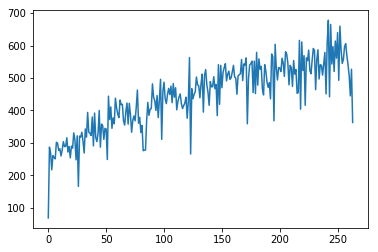

264


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
test_data = [69,287,269,217,261,255,251,302,299,277,282,260,278,304,289,289,316,272,289,254,290,284,331,310,248,322,166,321,318,333,305,269,343,318,394,333,330,323,380,291,392,317,304,329,400,287,358,353,311,345,343,249,444,372,411,345,377,359,438,408,389,378,432,418,419,368,355,396,423,358,422,387,333,369,383,368,410,463,361,379,332,354,276,278,278,370,425,385,404,406,482,441,430,400,446,378,434,496,311,458,487,436,421,449,468,449,475,424,483,441,470,402,428,442,451,421,406,415,423,441,376,427,563,266,467,436,450,458,503,479,476,439,483,512,395,508,526,479,456,416,489,473,473,504,467,480,384,541,419,539,470,517,532,544,491,512,521,496,501,519,539,503,500,450,507,510,513,557,492,543,540,562,359,499,540,544,552,455,552,452,579,478,559,527,536,466,448,541,522,487,471,486,436,574,566,368,604,532,494,532,531,520,561,546,505,581,574,546,479,539,532,474,554,512,526,453,455,616,404,611,523,569,416,562,553,586,524,513,555,591,585,464,555,587,497,541,539,509,543,579,451,610,678,442,665,543,597,520,614,561,640,493,660,587,545,557,597,606,569,541,507,445,527,363]
plt.plot(test_data)
plt.show()
print(len(test_data))

In [2]:
import numpy as np
def self_fft(inp_data, n, n2=None, model="original" ,wave=1):
    if(wave == 1):
        fft_data = np.fft.fft(inp_data)
    elif(wave ==2):
        fft_data = np.fft.fft(inp_data)/len(inp_data)
    else:
        print("erro wave only 1 or 2")
        return None
    length = len(fft_data)
    data = np.zeros(length)
    x = np.arange(0, len(data), 1)
    cos_list = []
    sin_list = []
    wave_list = []
    seq=np.fft.fftfreq(length,1.0)
    index = np.arange(0, length, 1.0) / length * (2 * np.pi)
    if(n2 != None):
        fft_data = fft_data[:n2+1]
    if(model == "abs"):
        tmp = sorted(list(enumerate(abs(fft_data))), key=lambda x:x[1] ,reverse=True)[:n]
        for i in range(n):
            tmp[i] = [tmp[i][0] , fft_data[tmp[i][0]]]
        fft_data = tmp
    elif(model == "original"):
        fft_data = list(enumerate(fft_data[:n]))
    else:
        print("erro model only abs or original")
        return None
    fft_out = np.zeros(np.asarray(fft_data).shape).tolist()
    for i in range(len(fft_data)):
        fft_out[i][0] = seq[fft_data[i][0]]
        fft_out[i][1] = fft_data[i][1]
    if(wave == 1 ):
        for k, p in fft_data:
            sinewave = (1/ len(x) * ( p.real * np.cos(seq[k] * 2 * np.pi * x)\
                                     -p.imag * np.sin(seq[k] * 2 * np.pi * x)))
            wave_list.append(sinewave)
            data += sinewave
        return wave_list ,fft_out ,data
    elif(wave ==2 ):
        for k, p in fft_data:
            if k != 0: p *= 2 # 除去直流成分之外，其余的系数都*2
            cos = np.real(p) * np.cos(k*index)
            sin = np.imag(p) * np.sin(k*index)
            data += cos # 余弦成分的系数为实数部
            data -= sin # 正弦成分的系数为负的虚数部
            cos_list.append(cos) 
            sin_list.append(sin) 
        return cos_list ,sin_list ,fft_out ,data
    else:
        print("erro wave only 1 or 2")
        return None

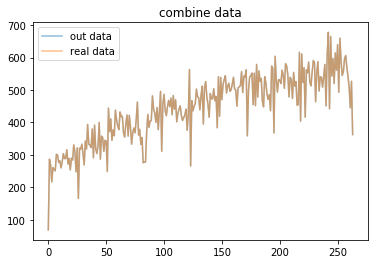

In [7]:
#波形融合數變化的動圖
from IPython.display import clear_output
import time
from scipy.stats import pearsonr
mse_list = []
pccs_list = []
for i in range(10,264,1):
    clear_output(wait=True)
    wave_list ,fft_data ,combine_data = self_fft(test_data ,i ,264 ,model = "abs" ,wave = 1)
    plt.plot(combine_data,label = 'out data',alpha=0.5)
    plt.plot(test_data,label = 'real data',alpha=0.5)
    plt.title("combine data")
    plt.legend()
    plt.show()
    pccs_list.append(pearsonr(combine_data , test_data)[0])
    mse_list.append(((combine_data - test_data) ** 2).mean())
    #time.sleep(0.01)

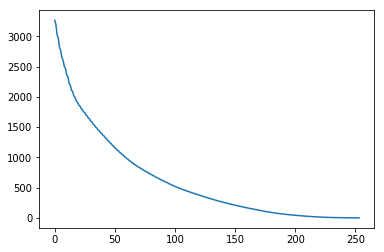

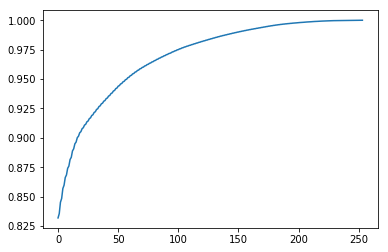

In [9]:
#波形融合數量
#x軸-融合數量 y軸-MSE值/皮爾森相關係數
plt.plot(mse_list)
plt.show()
plt.plot(pccs_list)
plt.show()

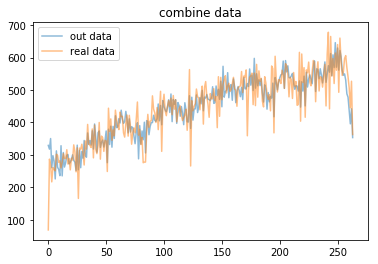

In [4]:
#前30波形組合比較
wave_list ,fft_data ,combine_data = self_fft(test_data ,30 ,264 ,model = "abs" ,wave = 1)
plt.plot(combine_data,label = 'out data',alpha=0.5)
plt.plot(test_data,label = 'real data',alpha=0.5)
plt.title("combine data")
plt.legend()
plt.show()

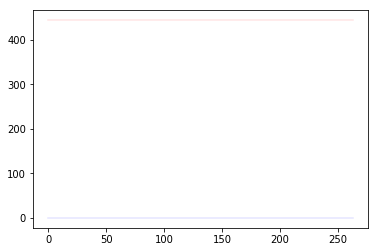

No handles with labels found to put in legend.


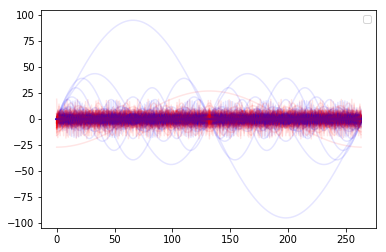

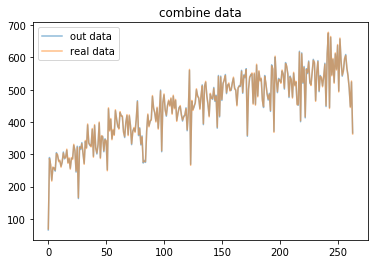

In [4]:
#所有波形圖
cos_list ,sin_list ,fft_data ,combine_data = self_fft(test_data ,132 ,264 ,model = "original",wave = 2)
for cos_data,sin_data,f in zip(cos_list,sin_list,fft_data):
    plt.plot(cos_data,color="red",alpha=0.1)
    plt.plot(sin_data,color="blue",alpha=0.1)
    if(f[0] == 0):
        plt.show()
plt.legend()
plt.show()
plt.plot(combine_data,label = 'out data',alpha=0.5)
plt.plot(test_data,label = 'real data',alpha=0.5)
plt.title("combine data")
plt.legend()
plt.show()